In [2]:
import ipyvuetify as v
import ipywidgets as widgets
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import src.input_pipeline as input_pipeline
sns.set()

In [3]:
# Load data from RKI
cleaned_data = input_pipeline.get_data()
# response = requests.get("https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson")

In [4]:
cleaned_data.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand
0,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,163400,2020-03-14,01001,22.03.2020 00:00
1,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,2,0,163401,2020-03-19,01001,22.03.2020 00:00
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,163402,2020-03-21,01001,22.03.2020 00:00
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,1,0,163403,2020-03-14,01001,22.03.2020 00:00
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,W,2,0,163404,2020-03-18,01001,22.03.2020 00:00


In [5]:
cleaned_data['Altersgruppe'].drop_duplicates()

0        A15-A34
5        A35-A59
36       A60-A79
91     unbekannt
93       A00-A04
116      A05-A14
157         A80+
Name: Altersgruppe, dtype: object

In [6]:
cleaned_data.describe(include='all')

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand
count,8919.000000,8919,8919,8919,8919,8919.000000,8919.000000,8919.000000,8919,8919,8919
unique,NaN,16,405,7,3,NaN,NaN,NaN,35,405,1
top,NaN,Bayern,LK Heinsberg,A35-A59,M,NaN,NaN,NaN,2020-03-18,05370,22.03.2020 00:00
freq,NaN,1902,154,3883,4815,NaN,NaN,NaN,1160,154,8919
mean,7.646597,NaN,NaN,NaN,NaN,2.086557,0.006167,167859.000000,NaN,NaN,NaN
std,3.231032,NaN,NaN,NaN,NaN,2.576508,0.079709,2574.837859,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,163400.000000,NaN,NaN,NaN
25%,5.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,165629.500000,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,167859.000000,NaN,NaN,NaN
75%,9.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,170088.500000,NaN,NaN,NaN


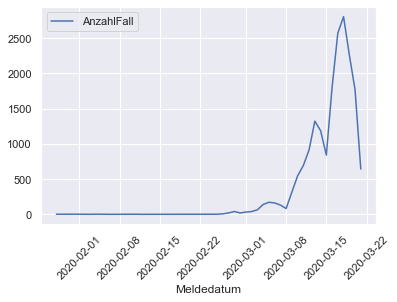

In [7]:
cleaned_data.groupby('Meldedatum').agg({'AnzahlFall': 'sum'}).plot(kind='line', rot=45)

In [8]:
cleaned_data.groupby(['Landkreis', 'Altersgruppe']).agg({'AnzahlFall': 'mean', 'AnzahlTodesfall': 'mean'})

AnzahlFall  AnzahlTodesfall
Landkreis            Altersgruppe                             
LK Ahrweiler         A15-A34         1.222222              0.0
                     A35-A59         1.538462              0.0
                     A60-A79         1.200000              0.0
LK Aichach-Friedberg A15-A34         1.000000              0.0
                     A35-A59         1.300000              0.0
...                                       ...              ...
StadtRegion Aachen   A05-A14         1.000000              0.0
                     A15-A34         2.384615              0.0
                     A35-A59         3.772727              0.0
                     A60-A79         1.666667              0.0
                     A80+            1.000000              0.0

[1572 rows x 2 columns]

In [11]:
melde_daten = sorted(cleaned_data['Meldedatum'].drop_duplicates().values)

In [12]:
day_lookup = {melde_daten[i]: i for i in range(len(melde_daten))}
date_looup = {i: melde_daten[i] for i in range(len(melde_daten))}